In [3]:
import numpy as np

class Erlang():
    
    def __init__(self, call_rate, call_time, max_traffic):
        self.call_rate = call_rate
        self.call_time = call_time
        self.E = call_rate*call_time/max_traffic
        
    def __str__(self):
        return (f'Call Rate: {self.call_rate} \n' +
                f'Call Time: {self.call_time} \n' +
                f'E: {self.E}')
        
    def B(self, n):
        '''
        Finds the probability of blockage with
        the Erlang B Function.
        '''
        top = (self.E**n)/ (np.prod(range(1,n+1)))
        x = [self.E**i for i in range(0,n+1)]
        y = [np.prod(range(1,j+1)) for j in range (0,n+1)]
        bottom = np.sum(np.divide(x,y))
        return top/bottom
    
    def C(self, n):
        '''
        Finds the probability of a
        delay with the Erlang C Function
        '''
        top = n*self.B(n)
        bottom = n - self.E*(1 - self.B(n))
        # Just so we don't divide by zero:
        if n == 0:
            return 1
        # The probability can't be bigger than 1:
        else:
            return np.minimum(1, top/bottom)
        

In [6]:
E = 2
n = 5
AWA = Erlang(E,1,1).C(n)/(1*(n-E))
print(AWA)
print(Erlang(E,1,1).C(n))

0.019900497512437814
0.05970149253731344


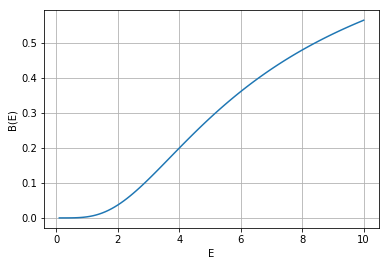

In [18]:
z = Erlang(0.1,1,1).B(5)
# a.B(2)
import matplotlib
import matplotlib.pyplot as plt

E_x = [i/10 for i in range(1,101)]
B_E = [Erlang(i/10,1,1).B(5) for i in range(1,101)]

fig, ax = plt.subplots()
ax.plot(E_x,B_E)
ax.grid()
ax.set(xlabel = 'E', ylabel = 'B(E)')
plt.show()

In [167]:
class FindErlang():
    
    def __init__(self):
        pass
    
    def findN_B(self, B, E):
        '''
        Finds N, given B and E,
        using the Erlang B Function
        '''
        n = 1
        while True:
            x = Erlang(E,1,1)
            B_found = x.B(n)
            if B_found <= B:
                return n, B_found
            else:
                n += 1
                
    def findE_B(self, n, B):
        '''
        Finds E, given B and n,
        using the Erlang B function
        '''
        E0 = 1
        eps = 0.001
        E1 = 0
        
        while True:
            x = Erlang(E0,1,1)
            B_found = x.B(n)
            if B_found - B >= eps:
                E2 = E0 
                break
            else:
                E0 += 1
        
        while True:
            x = Erlang(E2,1,1)
            B_found = x.B(n)
            step = abs(E2 - E1)
            
            if B_found - B >= eps:
                inter = E2
                E2 -= step/2
                E1 = inter
            elif B_found - B <= -eps:
                inter = E2
                E2 += step/2
                E1 = inter
            else:
                return E2
            
    def table_B(self, n_max, B):
        dict_erl = {}
        for k in range(1, n_max+1):
            E_B = [round(FindErlang().findE_B(k,i),2) for i in B]
            dict_erl[str(k)] = {i:j for i,j in zip(B,E_B)}
            
        return dict_erl
    
    def findE_B_grad(self, n, B):
        '''
        Finds E, given B and n,
        using the Erlang B function
        '''
        alpha = 0.5
        eps = 0.001
        E = 1
        while True:
            x = Erlang(E,1,1)
            B_found = x.B(n)
            error = abs(B_found - B)
            # Is B_found within the given error?
            if error <= eps:
                return E
            # Calculating the Derivative
            top = E**(n-1)/(np.prod(range(1,n)))
            x = [E**(i-1) for i in range(1,n+1)]
            y = [np.prod(range(1,j+1)) for j in range (1,n+1)]
            bottom = np.sum(np.divide(x,y))
            der = (B_found - B) * (top/bottom)
            # Gredient Descent
            # We have to add because the graph is
            # inversely concave for a fixed n.
            E -= alpha*der

In [193]:
import time

tic1 = time.time()
T = FindErlang().findE_B_grad(7,0.05)
toc1 = time.time()
tic2 = time.time()
T2 = FindErlang().findE_B(7,0.05)
toc2 = time.time()
print(T)
print(T2)
print(toc1-tic1)
print(toc2-tic2)

3.716096626519539
3.75
2.3817012310028076
0.0009980201721191406


In [137]:
import csv

B = [0.01,0.012,0.015,0.02,0.03,0.05,0.07,0.1,0.15,0.2,0.3,0.4,0.5]
G = FindErlang().table_B(5,B)
H = G['1']

keys = B
keys = [str(i) for i in list(H.keys())]

G_list = [G[str(i)] for i in G]

with open('test.csv', 'w') as f:
    f.write(' ,')
    for j in B:
        f.write(f'{j},')
    f.write('\n')
    
    n = 1
    for i in G_list:
        f.write(f'{n},')
        n += 1
        for key in i.keys():
            f.write(f'{i[key]},')
        f.write('\n')

In [22]:
import csv

print(dir(csv))

['Dialect', 'DictReader', 'DictWriter', 'Error', 'OrderedDict', 'QUOTE_ALL', 'QUOTE_MINIMAL', 'QUOTE_NONE', 'QUOTE_NONNUMERIC', 'Sniffer', 'StringIO', '_Dialect', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__version__', 'excel', 'excel_tab', 'field_size_limit', 'get_dialect', 'list_dialects', 're', 'reader', 'register_dialect', 'unix_dialect', 'unregister_dialect', 'writer']


In [20]:
k = FindErlang()
k.findE_B(3,0.1)

1.2674941805568616

C:\Users\Philippe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

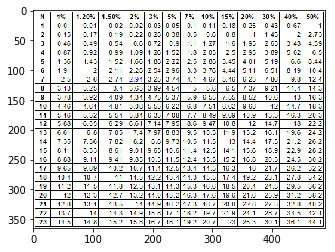

In [19]:
from scipy import misc
face = misc.imread('ErlangB.png')
import matplotlib.pyplot as plt
plt.imshow(face)
plt.show

In [52]:
A = np.ndarray([1,2])

AttributeError: 'list' object has no attribute 'shape'

In [65]:
k = []
# k.append(g[1,1,:])
k = [k.append(b) for b in g[1,1,:]]
type(list(g[1,1,:]))

list

<function matplotlib.pyplot.show(*args, **kw)>

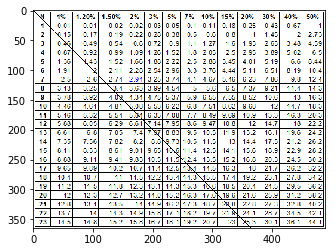

In [74]:
import numpy as np
g = face[:,:,:]
for i,j in zip(range(0,face.shape[0]),range(0,face.shape[1])):
    if list(g[i,j,:]) != [255,255,255] and list(g[i,j,:]) != [0,0,0]:
        g[i,j,:] = [0,0,0]
        
plt.imshow(face)
plt.show